In [86]:
import pandas as pd
import numpy as np
import os
import glob
import chardet

In [87]:
curr_path = 'C:/Users/cheng/Desktop/DSA3101/DSA3101_project/AirOnTimeCSV_cleaned/'
def get_encoding(file):
    with open(file, 'rb') as f:
        content = f.read(1000000)
    result = chardet.detect(content)
    return result['encoding']

In [97]:
## Group year by year (2001) split to buckets  
csv_files = [os.path.normpath(i) for i in glob.glob(curr_path + "airOT2001*")]

f = os.path.normpath(csv_files[0])
column_names = pd.read_csv(f, encoding="mac_roman").columns
data_2001_bins = [pd.DataFrame(columns=column_names) for i in range(15)]
data_2001_total = pd.DataFrame(columns=column_names)
for f in csv_files:
    f = os.path.normpath(f)
    data = pd.read_csv(f)
    data_2001_total = pd.concat([data_2001_total, data])
    for i in range(-2,13):
        convert = float(i)
        data_2001_bins[i] = pd.concat([data_2001_bins[i], data[data['DEP_DELAY_GROUP'] == convert]])

In [90]:
data_2001_total.shape

(5967780, 44)

In [98]:
## Variables of interest 
## Day of Week 
## Origin State/ Dest State
## CRS dep time/ CRS arr time 
## distance 
## seasons 

In [106]:
data_2001_total = data_2001_total[['DAY_OF_WEEK', 'CRS_DEP_TIME', 'CRS_ARR_TIME', 'ORIGIN_STATE_ABR', 'DEST_STATE_ABR', 'DISTANCE',
                                     'DISTANCE_GROUP', 'DEP_DELAY_GROUP']]
data_2001_total['CRS_DEP_TIME_GROUP'] = data_2001_total['CRS_DEP_TIME']//100
data_2001_total['DELAY'] = data_2001_total['DEP_DELAY_GROUP'].apply(lambda x: 1 if x > 3 else 0)
data_2001_total = data_2001_total.sample(n = 500000)

In [107]:
X = pd.get_dummies(data_2001_total[['DAY_OF_WEEK', 'ORIGIN_STATE_ABR', 'DISTANCE_GROUP']])
y = data_2001_total['DELAY']

c:\users\cheng\appdata\local\programs\python\python38\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [108]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X, y)

RandomForestRegressor(max_depth=2, random_state=0)

In [109]:
feature_importance = regr.feature_importances_

In [113]:
day_of_week_importance = 0
week = []
value_per_day = []
for i in range(7):
    day_of_week_importance += feature_importance[i]
    week.append(i + 1)
    value_per_day.append(feature_importance[i])


[0.0, 0.003233661011827277, 0.0, 0.0, 0.5417391301556354, 0.0, 0.0]


In [120]:
State_importance = 0
All_states = data_2001_total['ORIGIN_STATE_ABR'].unique()
All_states.sort()
value_per_state = []
for i in range(7,58):
    State_importance += feature_importance[i]
    value_per_state.append(feature_importance[i])


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.45063600100969714, 0.0, 0.0, 0.0, 0.0, 0.00040006943590434595, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [121]:
distance_importance = 0
distance_bin = [i for i in range(1,12)]
bin_value = []
for i in range(58,69):
    distance_importance += feature_importance[i]
    bin_value.append(feature_importance[i])


[0.0029839012689846867, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0005148674846060185, 0.0004923696333451624, 0.0, 0.0, 0.0]


<BarContainer object of 3 artists>

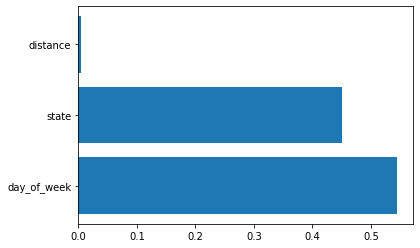

In [122]:
from matplotlib import pyplot as plt
name = ['day_of_week', 'state', 'distance']
overall = [day_of_week_importance, State_importance, distance_importance]
plt.barh(name, overall)

<BarContainer object of 7 artists>

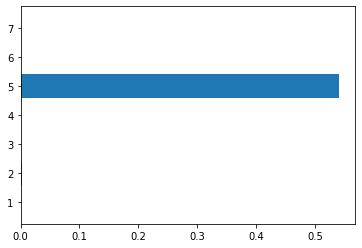

In [123]:
## Plot by day of week 
plt.barh(week, value_per_day)

<BarContainer object of 51 artists>

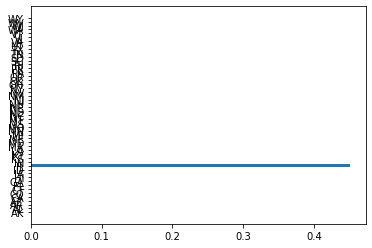

In [124]:
## Plot by state
plt.barh(All_states, value_per_state)

<BarContainer object of 11 artists>

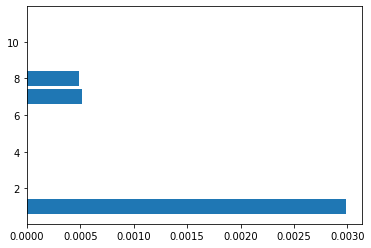

In [125]:
## Plot by distance 
plt.barh(distance_bin, bin_value)